In [34]:
import PyHEADTAIL

from __future__ import division, print_function
range = xrange

import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sbs
sbs.set_context('talk')

from scipy.constants import c, e, m_p

Import the PS lattice from the PyCERNMachines repository

In [35]:
from PyCERNmachines.CERNmachines import PS

One can choose to initialisate the machine considering linear or non-linear motion using the keyword 'logitudinal_focusing'

In [36]:
Ekin = 1.4e9
gamma = 1 + Ekin * e / (m_p * c**2)
beta = np.sqrt(1 - gamma**-2)

Q_x = 6.21
Q_y = 6.245

Qp_x = [-5.] # linear horizontal chromaticity, in tune units
Qp_y = [-7.] # linear vertical chromaticity, in tune units
# Qp_x = [0.]
# Qp_y = [0.]

machine = PS(n_segments=1, gamma=gamma, machine_configuration='LHCbeam_h7', 
             longitudinal_focusing='non-linear', Qp_x=Qp_x, Qp_y=Qp_y,Q_x=Q_x,Q_y=Q_y)

Synchrotron init. From kwargs: machine_configuration = 'LHCbeam_h7'
Synchrotron init. From kwargs: Q_y = 6.245
Synchrotron init. From kwargs: Qp_x = [-5.0]
Synchrotron init. From kwargs: n_segments = 1
Synchrotron init. From kwargs: Q_x = 6.21
Synchrotron init. From kwargs: gamma = 2.4921045053287254
Synchrotron init. From kwargs: Qp_y = [-7.0]


In [37]:
machine.longitudinal_map.pop_kick(1)
machine.longitudinal_map.phi_offsets[0] += np.pi


Now we have the transfer maps, let's generate the beams

generate_6D_Gaussian_bunch_matched() -> will generate a 4D gaussian beam, with a matched gaussian distribution in the longitudinal direction

In [38]:
betagamma = machine.betagamma

In [39]:
machine.betagamma

2.2826705556167606

In [40]:
# set parameters at injection
machine.beta_x = [20.65087277]
machine.alpha_x = [0.05677769231]
machine.D_x =[ 3.1369510109999998]
machine.beta_y = [12.02778782]
machine.alpha_y = [0.10479037]
machine.D_y = [0.]


In [41]:
n_macroparticles = 1000
intensity = 80e10 # in protons per bunch
epsn_x = 1e-6
epsn_y = 1e-6
epsn_z = 0.5 # [eVs]

bunch = machine.generate_6D_Gaussian_bunch_matched(
    n_macroparticles=n_macroparticles, intensity=intensity, 
    epsn_x=epsn_x, epsn_y=epsn_y, epsn_z=epsn_z)

*** Maximum RMS emittance 1.46369000884eV s.
... distance to target emittance: -4.95e-01
... distance to target emittance: 7.87e-01
... distance to target emittance: 4.88e-01
... distance to target emittance: 1.12e-01
... distance to target emittance: -3.16e-02
... distance to target emittance: 1.25e-03
... distance to target emittance: 9.65e-06
... distance to target emittance: -3.67e-10
... distance to target emittance: 2.54e-06
--> Emittance: 0.499999999633
--> Bunch length:7.74207042289


In [42]:
# convert units to mm mrad for pyOrbit
bunch.x = 1e3*bunch.x
bunch.xp = 1e3*bunch.xp
bunch.y = 1e3*bunch.y
bunch.yp = 1e3*bunch.yp

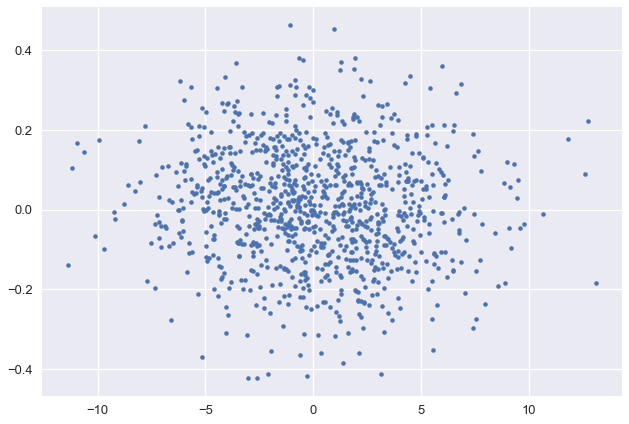

In [43]:
plt.plot(bunch.x,bunch.xp,'.')

In [44]:
# matched transverse distribution, zeros in longitudinal
np.savetxt('PS_matched_transvers.dist',
           np.array([bunch.x, bunch.xp, bunch.y, bunch.yp, np.zeros(len(bunch.x)), np.zeros(len(bunch.x))]).T,
           delimiter=' ',newline='\n')